In [39]:
#--------------------------
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#--------------------------

In [11]:
#--------------------------------------------------
# Load dataset
df = pd.read_csv('/workspaces/End_to_end_insurance_price_predection/data/processed/insurance_cleaned.csv')
print("Dataset loaded successfully.")

# ℹ️ Display basic information about the dataset
print("\nDataset Information:")
print(f"Dataset shape: {df.shape}")
print(f"Dataset info: {df.info()}")
#--------------------------------------------------

Dataset loaded successfully.

Dataset Information:
Dataset shape: (1337, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
Dataset info: None


In [15]:
#--------------------------------------------------
# Recheck for missing values
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Recheck for duplicated rows
print("\nNumber of Duplicated Rows:", df.duplicated().sum())


Missing Values in Each Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of Duplicated Rows: 0


In [16]:
#--------------------------------------------------
# Describe the dataset
print("\nStatistical Summary of Numerical Features:")
print(df.describe())
#--------------------------------------------------



Statistical Summary of Numerical Features:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


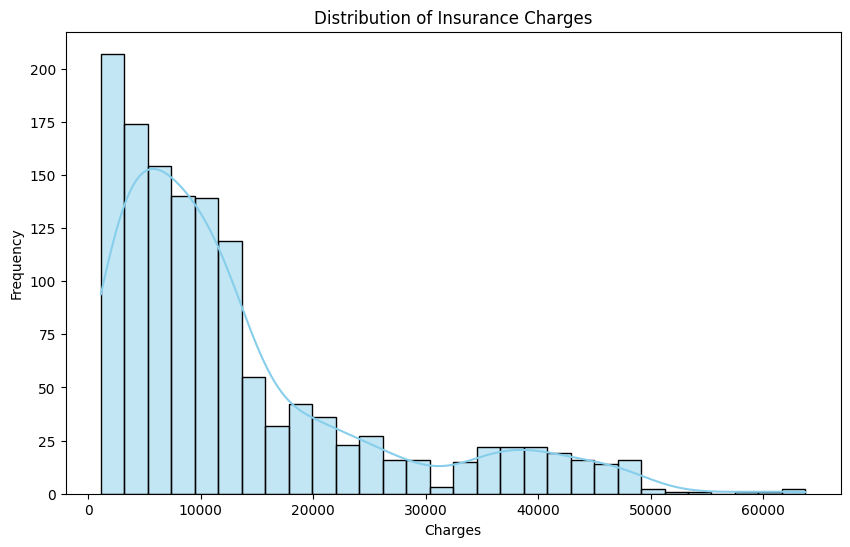

In [18]:
#--------------------------------------------------
# Visualization of distributions of insurance charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

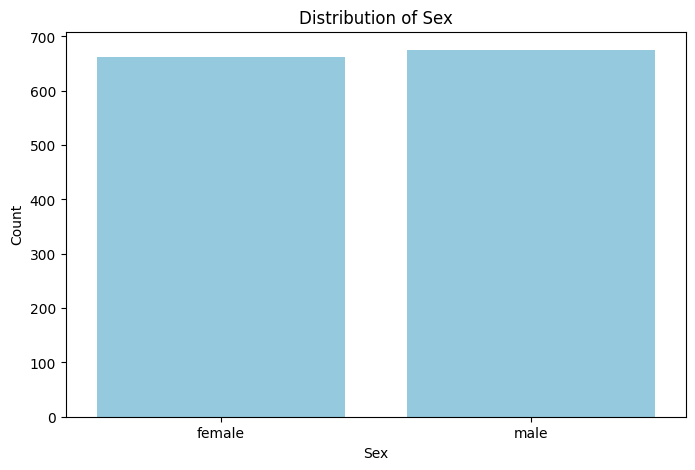

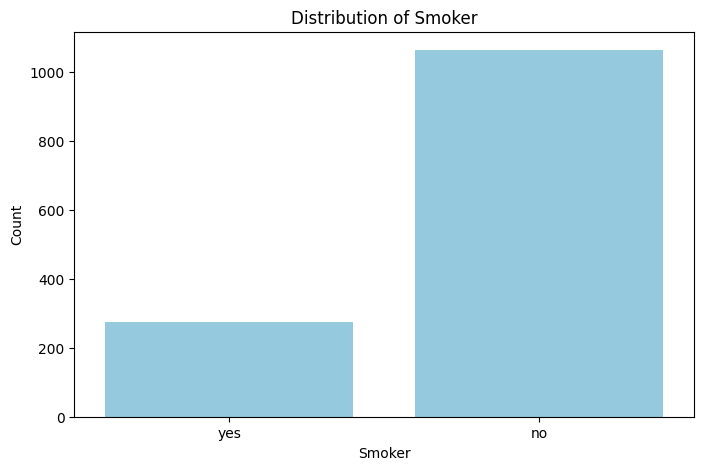

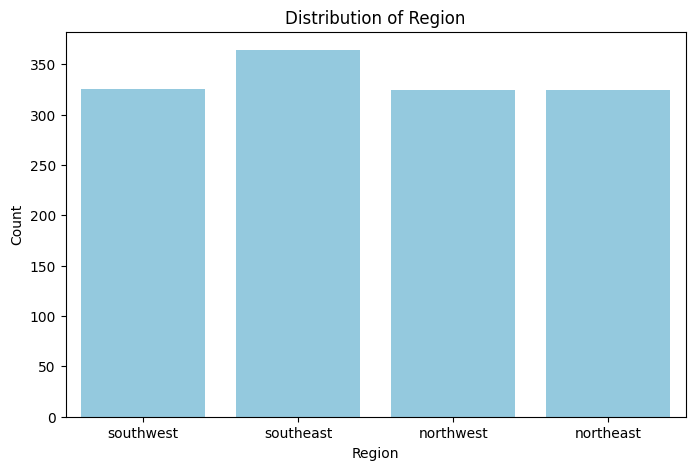

In [24]:
#---------------------------------------------
#Checking for each categorical feature distribution
categorical_features =  ['sex', 'smoker', 'region']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature,color='skyblue')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

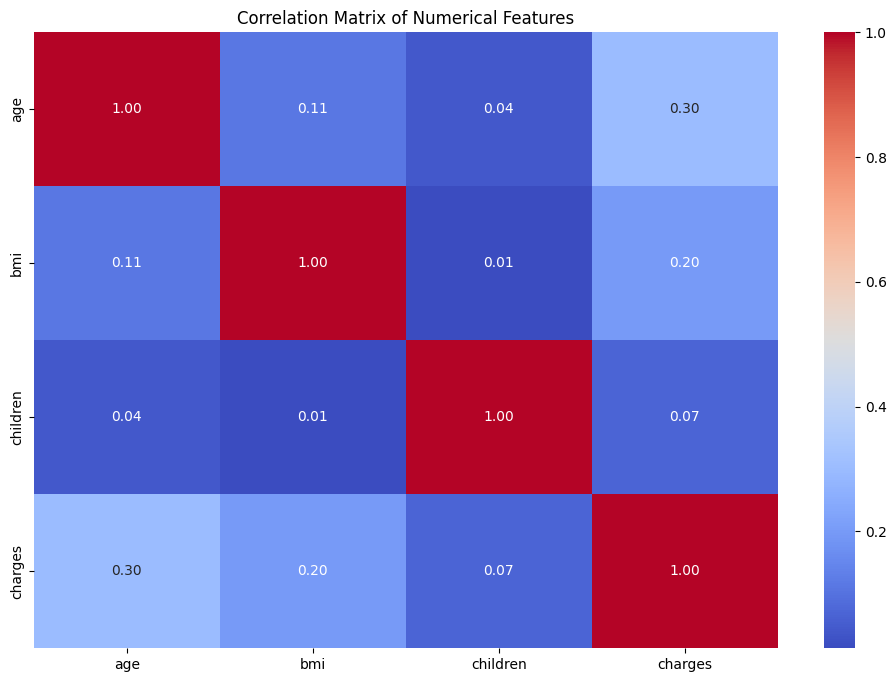


Correlation Matrix (numerical features):
               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


In [40]:
#--------------------------------------------------
# Check how features correlate with each other (use only numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nCorrelation Matrix (numerical features):")
print(correlation_matrix)
#--------------------------------------------------

We can notice that age , BMI, and children have positive correlation to insurance price where age affect the most follow by bmi and number of children.

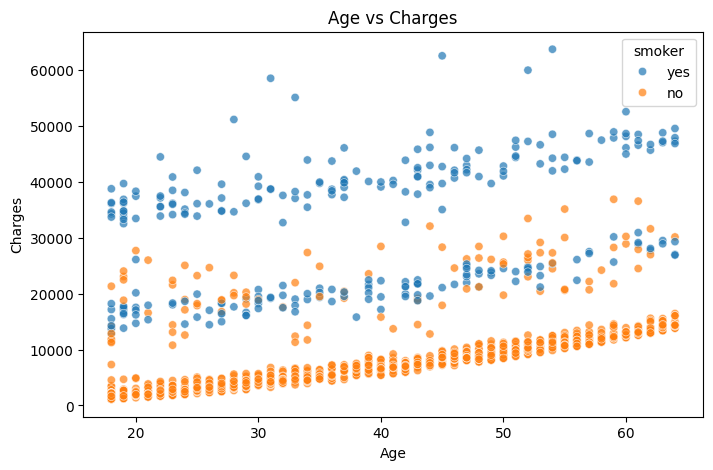

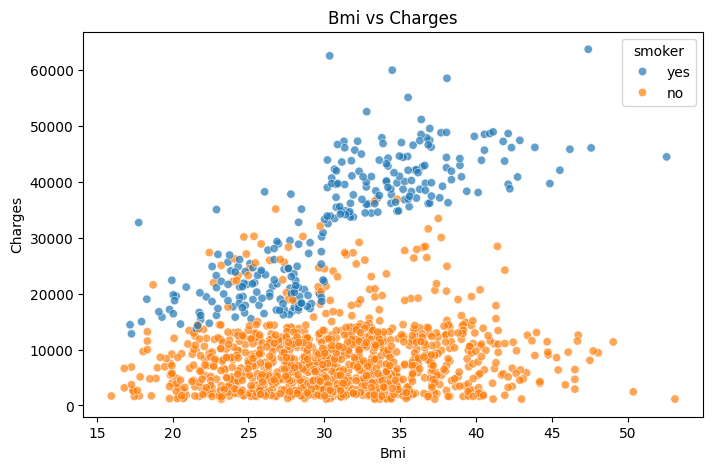

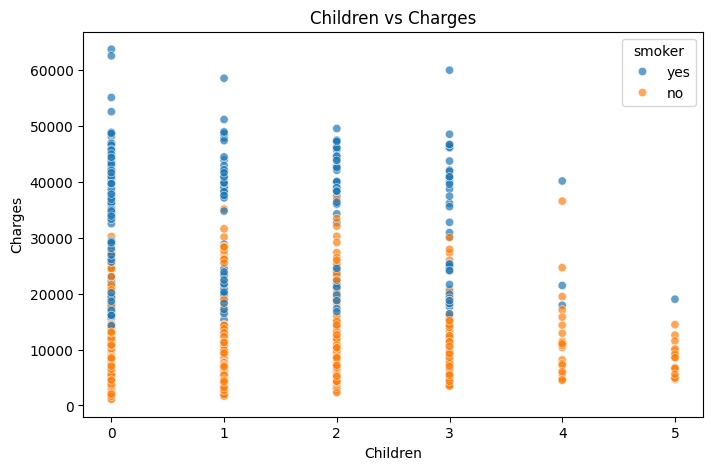

In [41]:
# --------------------------------------------------
# Visualize relationships between numerical features and charges determined by smoking status
numerical_features = ['age', 'bmi', 'children']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y='charges', hue='smoker', alpha=0.7)
    plt.title(f'{feature.capitalize()} vs Charges')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()
# --------------------------------------------------


Smokers have significant higher insurance charge than non - smoker.

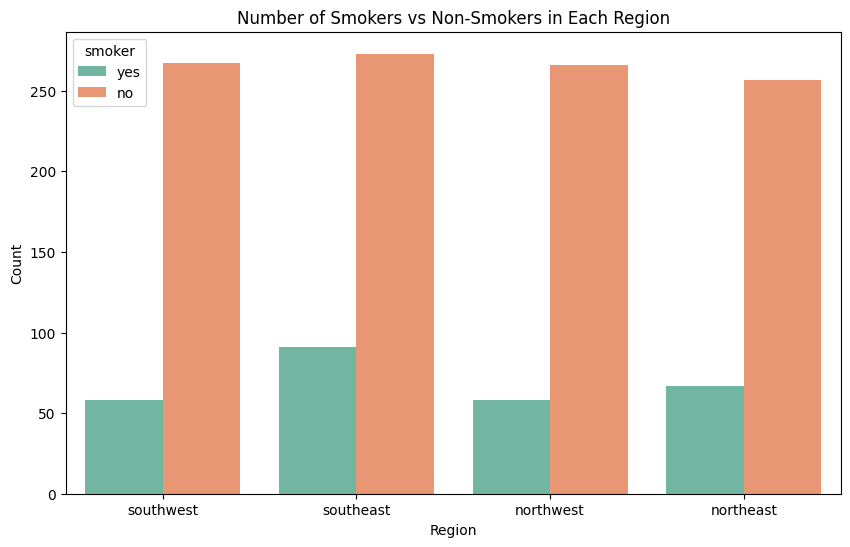

In [42]:
#--------------------------------------------------
# check nmumber of smoker vs non smoker in each region
#--------------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='region',hue= 'smoker', palette='Set2')
plt.title('Number of Smokers vs Non-Smokers in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

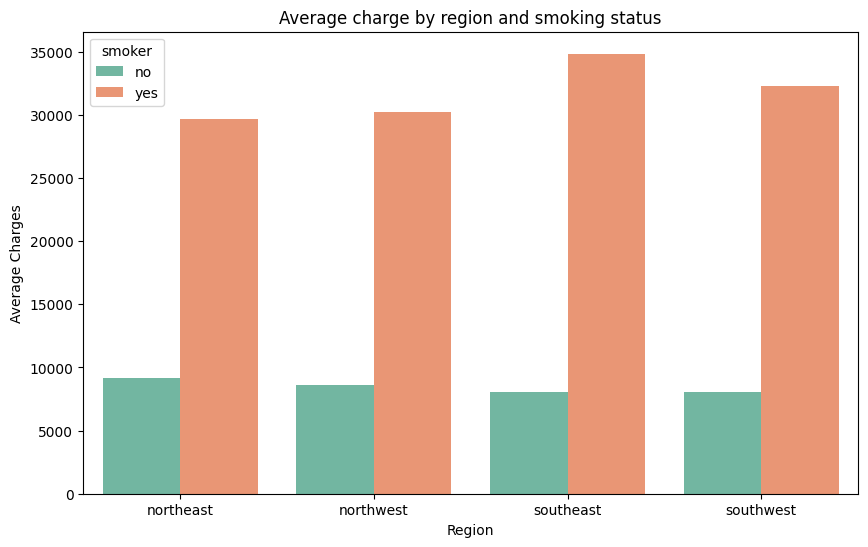

In [43]:
#-----------------------------------------
# Visualize average charges by region and smoking status
#-----------------------------------------
grouped = df.groupby(['region','smoker'], as_index=False)['charges'].mean()
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='region', y='charges', hue='smoker', palette='Set2', ci=None)
plt.title('Average charge by region and smoking status')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()